In [1]:
!pip install matplotlib
!pip install plotly
!pip install kaleido


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 23.9 MB 173 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 79.9 MB 98 kB/s eta 0:00:013
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import plotly.express as px
import kaleido

In [31]:
li = []
df = pd.read_csv("out.csv")
li.append(df)
df = pd.read_csv("outN.csv")
li.append(df)
data = pd.concat(li, axis=0, ignore_index=True)
data

id   n type  bruteTime  bnbTime  bruteConfigurations  bnbConfigurations
0       1   4    Z          1        1                   11                 12
1       2   4    Z          0        0                   13                  9
2       3   4    Z          0        0                    3                  3
3       4   4    Z          0        0                    2                  3
4       5   4    Z          0        0                   16                 10
...   ...  ..  ...        ...      ...                  ...                ...
7995  496  30    N    6080893     1943           1073741824             195364
7996  497  30    N    2225163      102            400372736               7163
7997  498  30    N          3        0                  427                  7
7998  499  30    N    1114836        0            192610288                 25
7999  500  30    N    5511098      822           1073741824              82948

[8000 rows x 7 columns]

In [32]:
bruteTime= data.groupby(['n','type']).agg({'bruteTime': ['mean', 'min', 'max']})
bnbTime= data.groupby(['n','type']).agg({'bnbTime': ['mean', 'min', 'max']})

bruteConfigurations=data.groupby(['n','type']).agg({'bruteConfigurations': ['mean', 'min', 'max']})
bnbConfigurations=data.groupby(['n','type']).agg({'bnbConfigurations': ['mean', 'min', 'max']})

In [56]:
display(bruteTime)
bruteTime.to_csv('bruteTime.csv', encoding='utf-8')

display(bnbTime)
bnbTime.to_csv('bnbTime.csv', encoding='utf-8')

display(bruteConfigurations)
bruteConfigurations.to_csv('bruteConfigurations.csv', encoding='utf-8')

display(bnbConfigurations)
bnbConfigurations.to_csv('bnbConfigurations.csv', encoding='utf-8')

bruteTime             
                mean min      max
n  type                          
4  N           0.038   0        3
   Z           0.020   0        3
10 N           5.770   0       40
   Z           4.668   0       22
15 N         100.288   0      340
   Z          98.636   0      363
20 N        3210.874   0    10947
   Z        2986.486   0    10262
22 N       13702.212   0    71189
   Z       12710.338   0    51231
25 N      101285.956   0   275314
   Z       96008.846   1   318402
27 N      404469.910   0   900315
   Z      382166.738   1  1070975
30 N     3239351.912   0  6952673
   Z     3051658.898   2  7143737

bnbTime             
               mean min      max
n  type                         
4  N          0.006   0        1
   Z          0.010   0        2
10 N          0.158   0       26
   Z          1.902   0       15
15 N          0.726   0       36
   Z         28.270   0      135
20 N          3.826   0      247
   Z        514.828   0     3765
22 N          9.558   0      595
   Z       1657.360   0    17297
25 N         40.942   0     2515
   Z       9982.890   0    63081
27 N         67.130   0     3949
   Z      32971.602   0   214019
30 N        208.096   0    22951
   Z     205330.360   0  1245276

bruteConfigurations                 
                       mean  min         max
n  type                                     
4  N           1.130800e+01    2          16
   Z           1.105600e+01    2          16
10 N           6.270100e+02    2        1024
   Z           5.593980e+02    7        1024
15 N           1.823503e+04    2       32768
   Z           1.672986e+04   14       32768
20 N           5.699669e+05    2     1048576
   Z           5.270229e+05   28     1048576
22 N           2.247112e+06    2     4194304
   Z           2.090817e+06   32     4194304
25 N           1.829454e+07    2    33554432
   Z           1.662048e+07   64    33554432
27 N           7.261838e+07    2   134217728
   Z           6.654976e+07  112   134217728
30 N           5.706720e+08    2  1073741824
   Z           5.293694e+08  380  1073741824

bnbConfigurations               
                     mean min        max
n  type                                 
4  N         4.394000e+00   2         11
   Z         7.582000e+00   3         16
10 N         1.377800e+01   2        237
   Z         1.601060e+02   4        555
15 N         5.861200e+01   2       3405
   Z         2.838924e+03   4      10120
20 N         3.143600e+02   2      26086
   Z         5.760365e+04   6     264432
22 N         8.543620e+02   2      57354
   Z         1.792674e+05   7     879460
25 N         3.742334e+03   2     271916
   Z         1.119199e+06   8    5328848
27 N         5.717504e+03   2     317572
   Z         3.808320e+06   7   18744328
30 N         1.978180e+04   2    2140788
   Z         2.347322e+07   8  154069495

In [34]:
fig1 = pd.DataFrame()

In [35]:
import matplotlib.pyplot as plt


In [37]:
fig1['brute_time_mean']=list(bruteTime[('bruteTime', 'mean')])
fig1['bnb_time_mean']=list(bnbTime[('bnbTime', 'mean')])
fig1['brute_time_max']=list(bruteTime[('bruteTime', 'max')])
fig1['bnb_time_max']=list(bnbTime[('bnbTime', 'max')])
fig1['n']=['4','4','10','10','15','15','20','20', '22','22', '25','25','27','27','30', '30']
fig1['type']=['N','Z','N','Z','N','Z','N','Z','N','Z','N','Z','N','Z','N','Z']

In [38]:
fig1

brute_time_mean  bnb_time_mean  brute_time_max  bnb_time_max   n type
0             0.038          0.006               3             1   4    N
1             0.020          0.010               3             2   4    Z
2             5.770          0.158              40            26  10    N
3             4.668          1.902              22            15  10    Z
4           100.288          0.726             340            36  15    N
5            98.636         28.270             363           135  15    Z
6          3210.874          3.826           10947           247  20    N
7          2986.486        514.828           10262          3765  20    Z
8         13702.212          9.558           71189           595  22    N
9         12710.338       1657.360           51231         17297  22    Z
10       101285.956         40.942          275314          2515  25    N
11        96008.846       9982.890          318402         63081  25    Z
12       404469.910         67.130          900315          3949  27    N
13       382166.738      32971.602         1070975        214019  27    Z
14      3239351.912        208.096         6952673         22951  30    N
15      3051658.898     205330.360         7143737       1245276  30    Z

In [39]:
fig1.loc[fig1['type'] == 'N']['bnb_time_mean']

0       0.006
2       0.158
4       0.726
6       3.826
8       9.558
10     40.942
12     67.130
14    208.096
Name: bnb_time_mean, dtype: float64

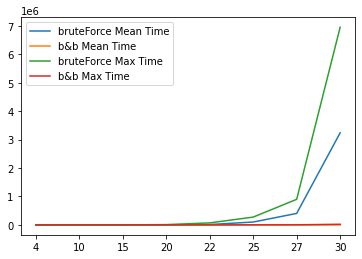

In [40]:
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['brute_time_mean'], label='bruteForce Mean Time')
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['bnb_time_mean'], label='b&b Mean Time' )
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['brute_time_max'], label='bruteForce Max Time' )
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['bnb_time_max'], label='b&b Max Time' )
plt.legend()
plt.savefig('normal_time.png')


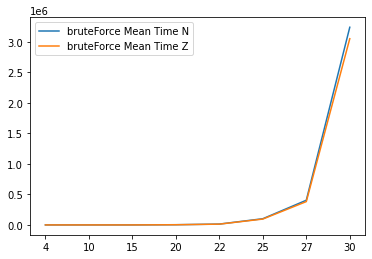

In [62]:
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['brute_time_mean'], label='bruteForce Mean Time N')
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['brute_time_mean'], label='bruteForce Mean Time Z')


plt.legend()
plt.savefig('time_bf.png')


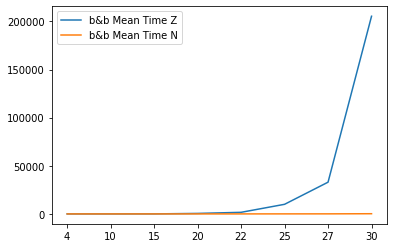

In [63]:
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['bnb_time_mean'], label='b&b Mean Time Z' )
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['bnb_time_mean'], label='b&b Mean Time N' )

plt.legend()
plt.savefig('time_bnb.png')

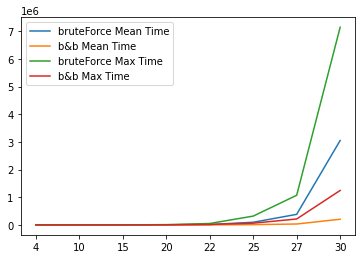

In [41]:
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['brute_time_mean'], label='bruteForce Mean Time')
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['bnb_time_mean'], label='b&b Mean Time' )
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['brute_time_max'], label='bruteForce Max Time' )
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['bnb_time_max'], label='b&b Max Time' )
plt.legend()
plt.savefig('difficult_time.png')



In [42]:
fig2=pd.DataFrame()

In [47]:
fig2['brute_configurations_mean']=list(bruteConfigurations[('bruteConfigurations', 'mean')])
fig2['bnb_configurations_mean']=list(bnbConfigurations[('bnbConfigurations', 'mean')])
fig2['brute_configurations_max']=list(bruteConfigurations[('bruteConfigurations', 'max')])
fig2['bnb_configurations_max']=list(bnbConfigurations[('bnbConfigurations', 'max')])



fig2['n']=['4','4','10','10','15','15','20','20', '22','22', '25','25','27','27','30', '30']
fig2['type']=['N','Z','N','Z','N','Z','N','Z','N','Z','N','Z','N','Z','N','Z']

In [48]:
fig2

brute_configurations_mean  bnb_configurations_mean  \
0                1.130800e+01             4.394000e+00   
1                1.105600e+01             7.582000e+00   
2                6.270100e+02             1.377800e+01   
3                5.593980e+02             1.601060e+02   
4                1.823503e+04             5.861200e+01   
5                1.672986e+04             2.838924e+03   
6                5.699669e+05             3.143600e+02   
7                5.270229e+05             5.760365e+04   
8                2.247112e+06             8.543620e+02   
9                2.090817e+06             1.792674e+05   
10               1.829454e+07             3.742334e+03   
11               1.662048e+07             1.119199e+06   
12               7.261838e+07             5.717504e+03   
13               6.654976e+07             3.808320e+06   
14               5.706720e+08             1.978180e+04   
15               5.293694e+08             2.347322e+07   

    brute_configurations_max  bnb_configurations_max   n type  
0                         16                      11   4    N  
1                         16                      16   4    Z  
2                       1024                     237  10    N  
3                       1024                     555  10    Z  
4                      32768                    3405  15    N  
5                      32768                   10120  15    Z  
6                    1048576                   26086  20    N  
7                    1048576                  264432  20    Z  
8                    4194304                   57354  22    N  
9                    4194304                  879460  22    Z  
10                  33554432                  271916  25    N  
11                  33554432                 5328848  25    Z  
12                 134217728                  317572  27    N  
13                 134217728                18744328  27    Z  
14                1073741824                 2140788  30    N  
15                1073741824               154069495  30    Z

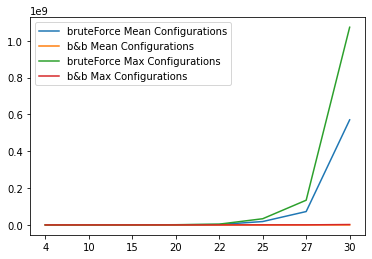

In [49]:
plt.plot(fig2.loc[fig1['type'] == 'N']['n'],fig2.loc[fig1['type'] == 'N']['brute_configurations_mean'], label='bruteForce Mean Configurations')
plt.plot(fig2.loc[fig1['type'] == 'N']['n'],fig2.loc[fig1['type'] == 'N']['bnb_configurations_mean'], label='b&b Mean Configurations' )
plt.plot(fig2.loc[fig1['type'] == 'N']['n'],fig2.loc[fig1['type'] == 'N']['brute_configurations_max'], label='bruteForce Max Configurations' )
plt.plot(fig2.loc[fig1['type'] == 'N']['n'],fig2.loc[fig1['type'] == 'N']['bnb_configurations_max'], label='b&b Max Configurations' )
plt.legend()
plt.savefig('normal_configurations.png')


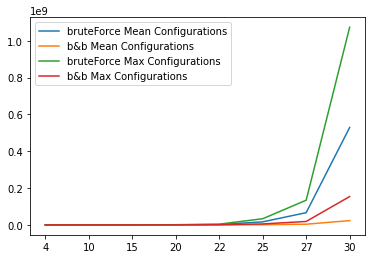

In [50]:
plt.plot(fig2.loc[fig1['type'] == 'Z']['n'],fig2.loc[fig1['type'] == 'Z']['brute_configurations_mean'], label='bruteForce Mean Configurations')
plt.plot(fig2.loc[fig1['type'] == 'Z']['n'],fig2.loc[fig1['type'] == 'Z']['bnb_configurations_mean'], label='b&b Mean Configurations' )
plt.plot(fig2.loc[fig1['type'] == 'Z']['n'],fig2.loc[fig1['type'] == 'Z']['brute_configurations_max'], label='bruteForce Max Configurations' )
plt.plot(fig2.loc[fig1['type'] == 'Z']['n'],fig2.loc[fig1['type'] == 'Z']['bnb_configurations_max'], label='b&b Max Configurations' )
plt.legend()
plt.savefig('difficult_configurations.png')


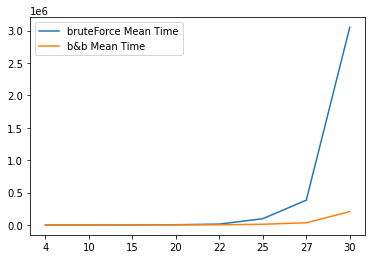

In [54]:
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['brute_time_mean'], label='bruteForce Mean Time')
plt.plot(fig1.loc[fig1['type'] == 'Z']['n'],fig1.loc[fig1['type'] == 'Z']['bnb_time_mean'], label='b&b Mean Time' )
plt.legend()
plt.savefig('difficult_mean_time.png')



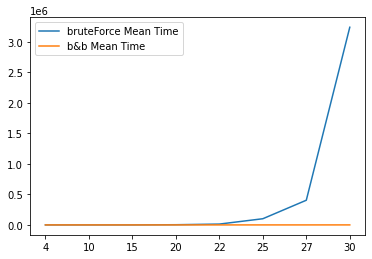

In [55]:
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['brute_time_mean'], label='bruteForce Mean Time')
plt.plot(fig1.loc[fig1['type'] == 'N']['n'],fig1.loc[fig1['type'] == 'N']['bnb_time_mean'], label='b&b Mean Time' )
plt.legend()
plt.savefig('normal_mean_time.png')

